In [147]:
library(ggplot2)
source("../../../../src/tools.R")
set_notebook_plot_size(50,10)
plotting <- function (stratified = T, name = "eln_comp", algo="RFS" , all=FALSE){
    if (stratified){
        df <- read.table(paste(paste("../Reshuffling_eln_stratified/",name,sep=""),"_reshuffle_importance.tsv",sep=""),sep="\t",header=T)
    }else{
        df <- read.table(paste(paste("../Reshuffling/",name,sep=""),"_reshuffle_importance.tsv",sep=""),sep="\t",header=T)
    }
    if (!all){
        df <- df[df$algo==algo,]
    }    
    df$Ratio <- df$ref_CI/df$permuted_CI
    ggplot(df,aes(x=reorder(feature,-Ratio,median),y=Ratio)) + geom_boxplot(aes(fill = reorder(feature,-Ratio,median)), notch=F)+theme(plot.title = element_text( size=45, face="bold.italic",hjust=0.5),legend.position="none",axis.text.x = element_text(angle = 90, hjust = 0.8,vjust=0.8,size=18),axis.text.y=element_text(size=28),axis.title.y = element_text(size = 20),axis.title.x = element_text(size = 20))+xlab("Selected Features") +
    ggtitle("Feature Importance Reshuffling (Ratio of reference C-I over reshuffle C-I 100 times by feature)")
}

# I) ELN and Components

## A) ELN Stratified

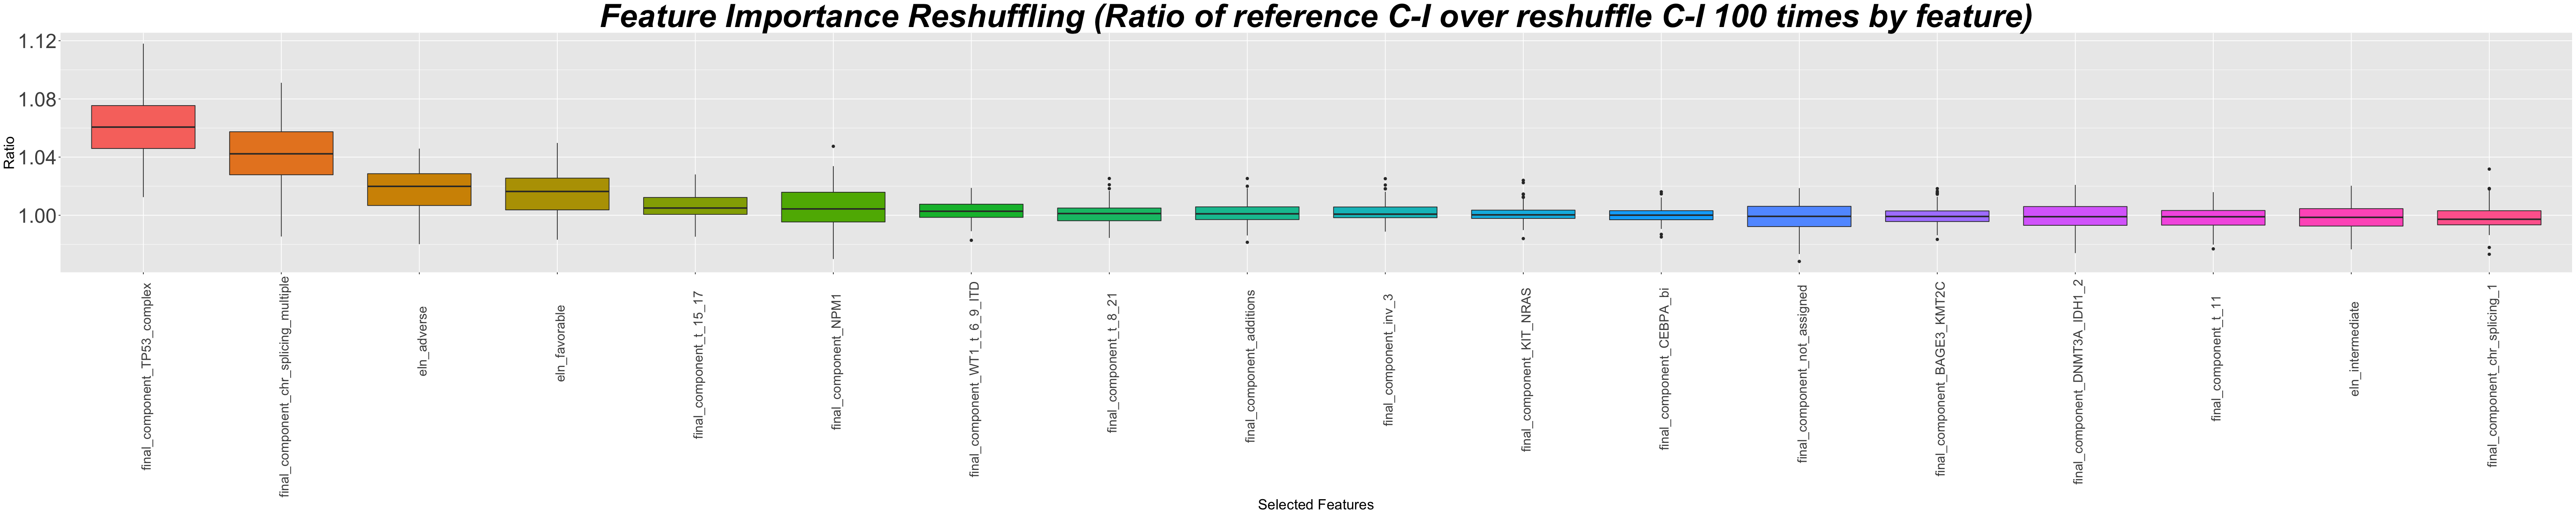

In [110]:
plotting(name="eln_comp")

## B) ELN Not Stratified

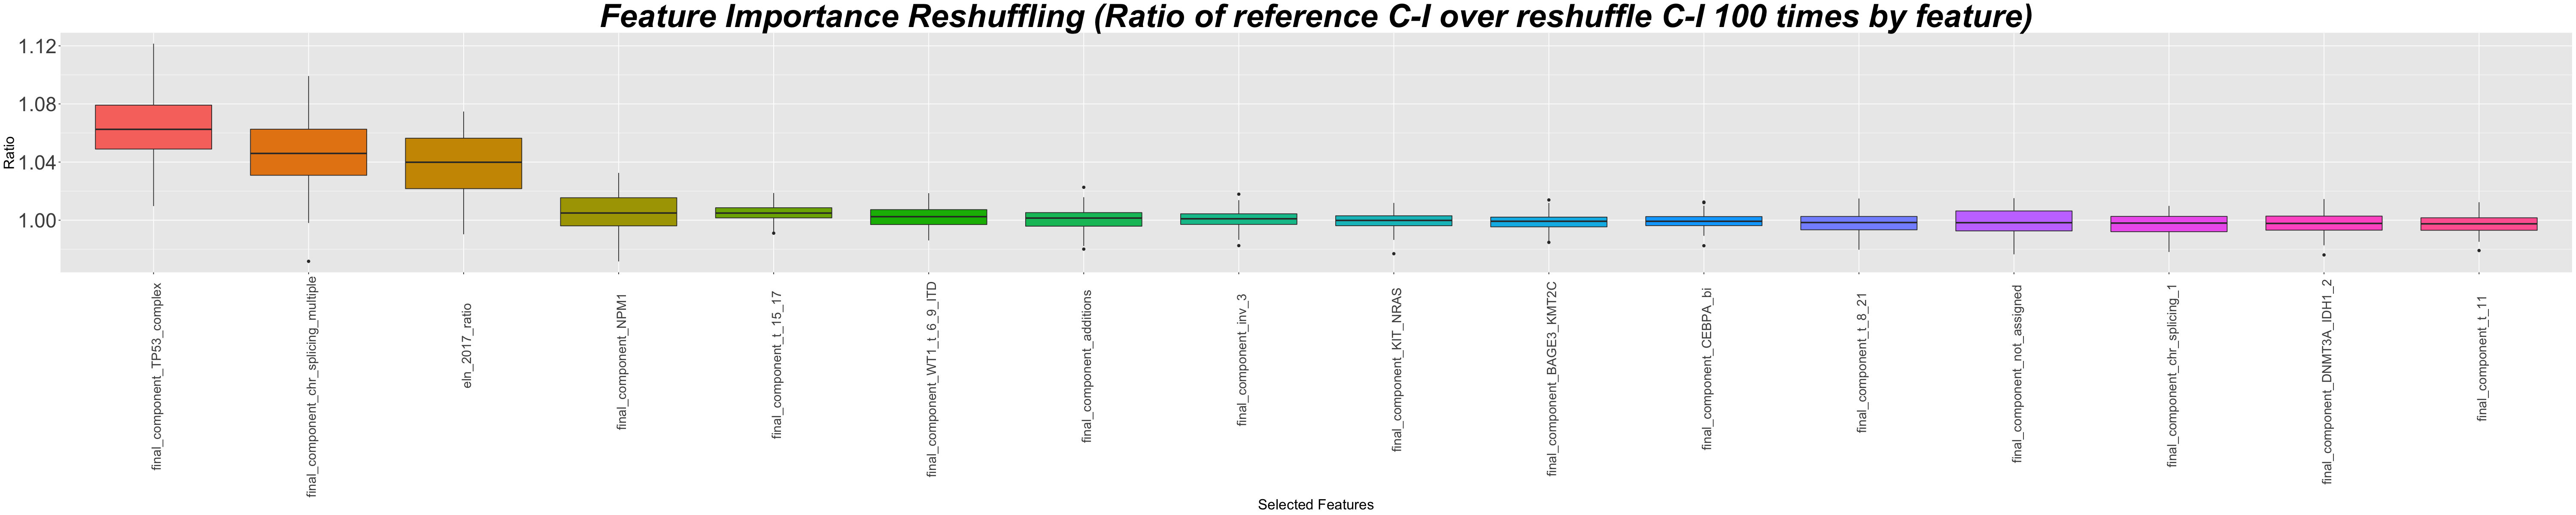

In [106]:
plotting(F,"eln_comp")

# II) ELN and Genetics / Components and Genetics

## A) ELN Stratified

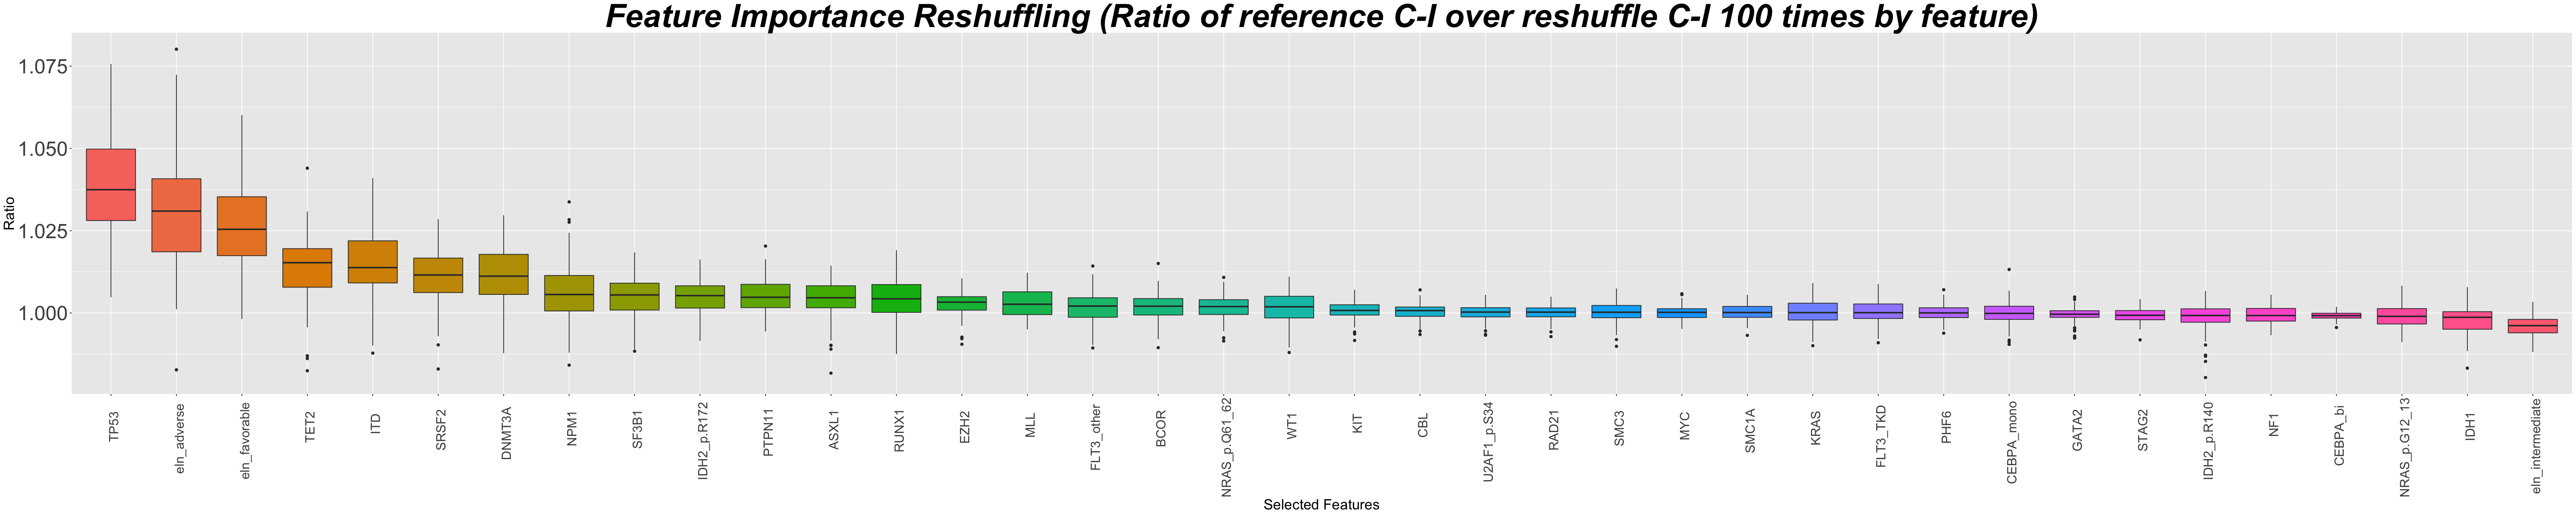

In [119]:
plotting(name="eln_gen")

## B) ELN Not Stratified

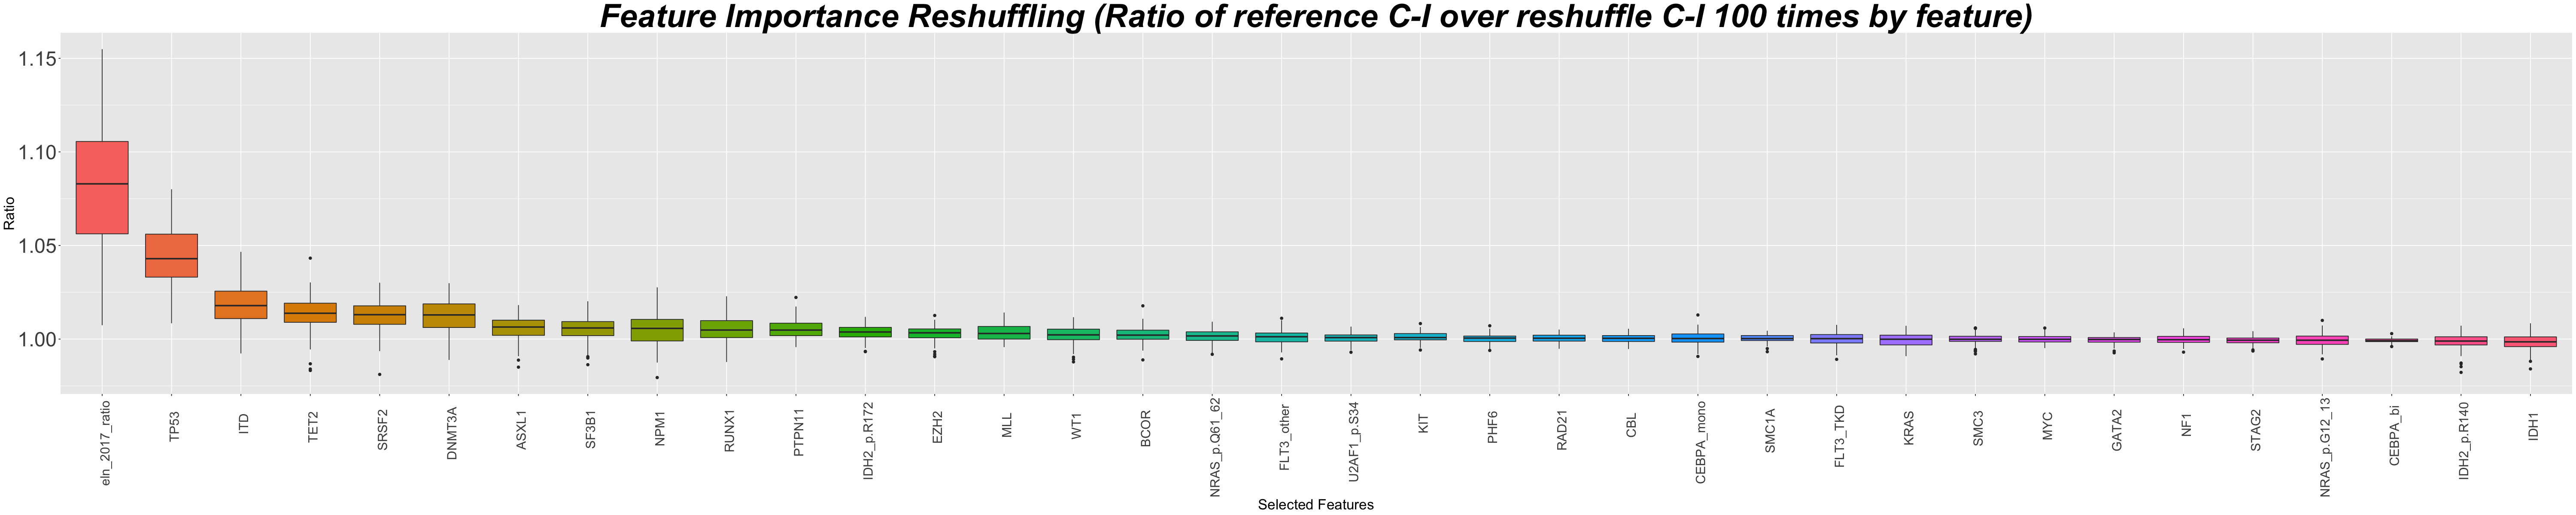

In [136]:
plotting(F,"eln_gen")

## C) Components and Genetics

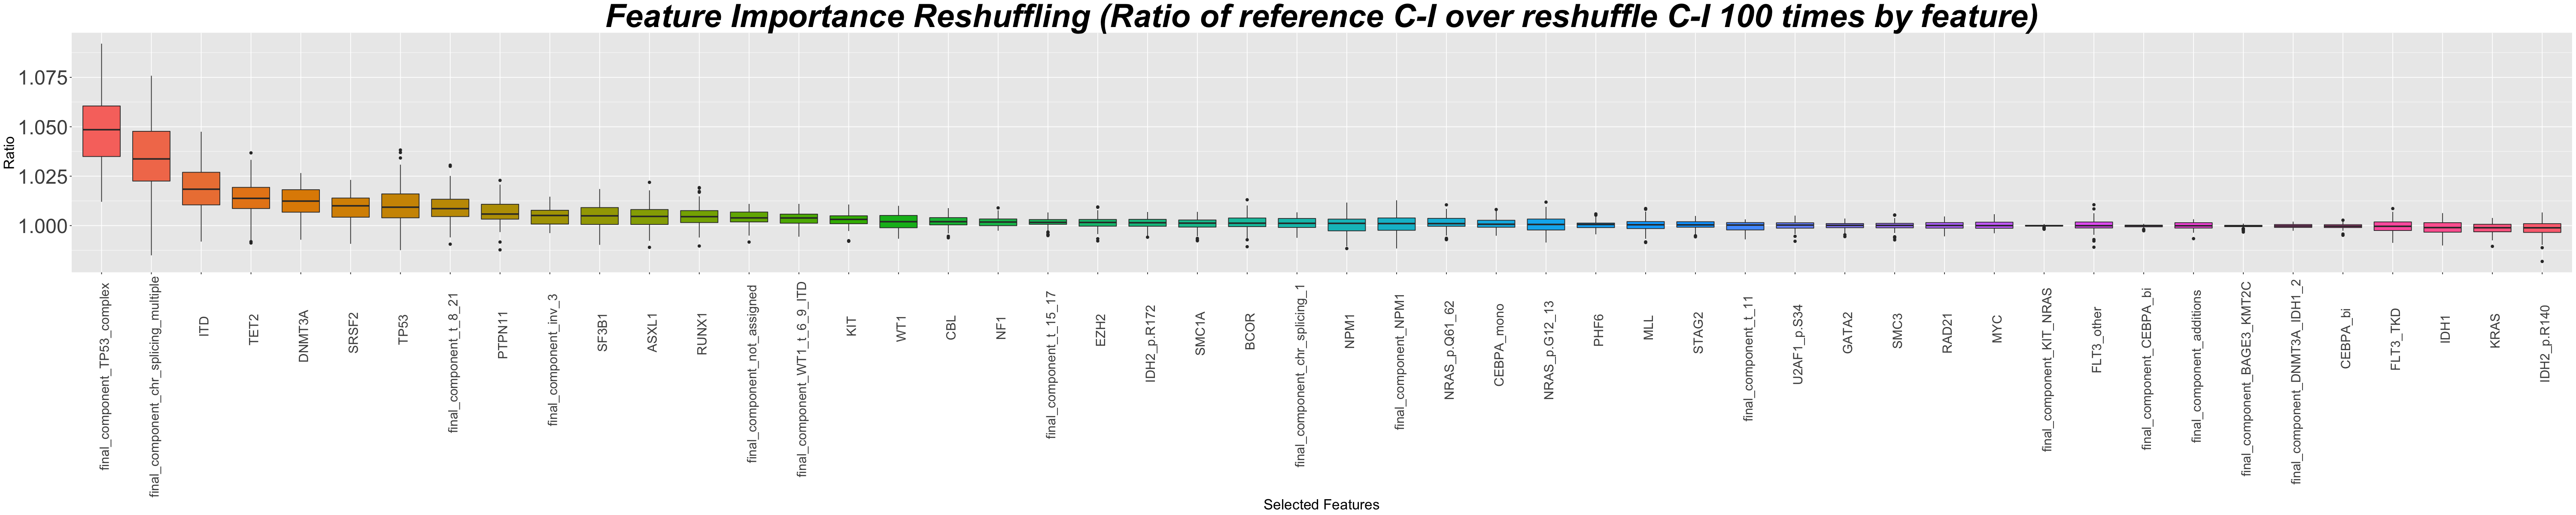

In [137]:
plotting(F,"comp_gen")

# III) ELN and Cytogenetic / Components and Cytogenetic

## A) ELN Stratified

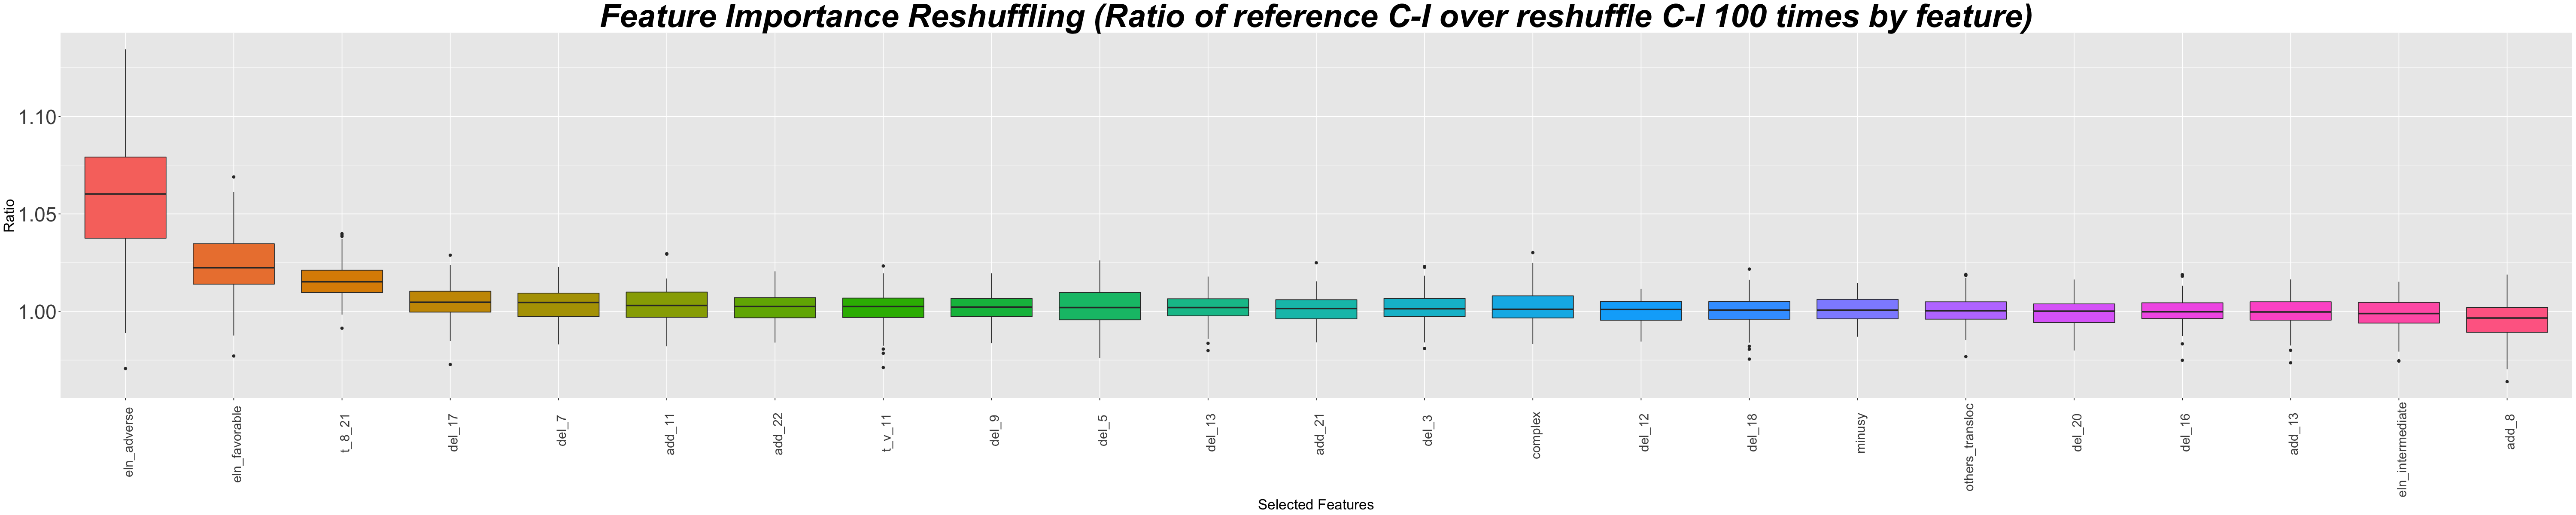

In [121]:
plotting(name="eln_cyto")

## B) ELN Not Stratified

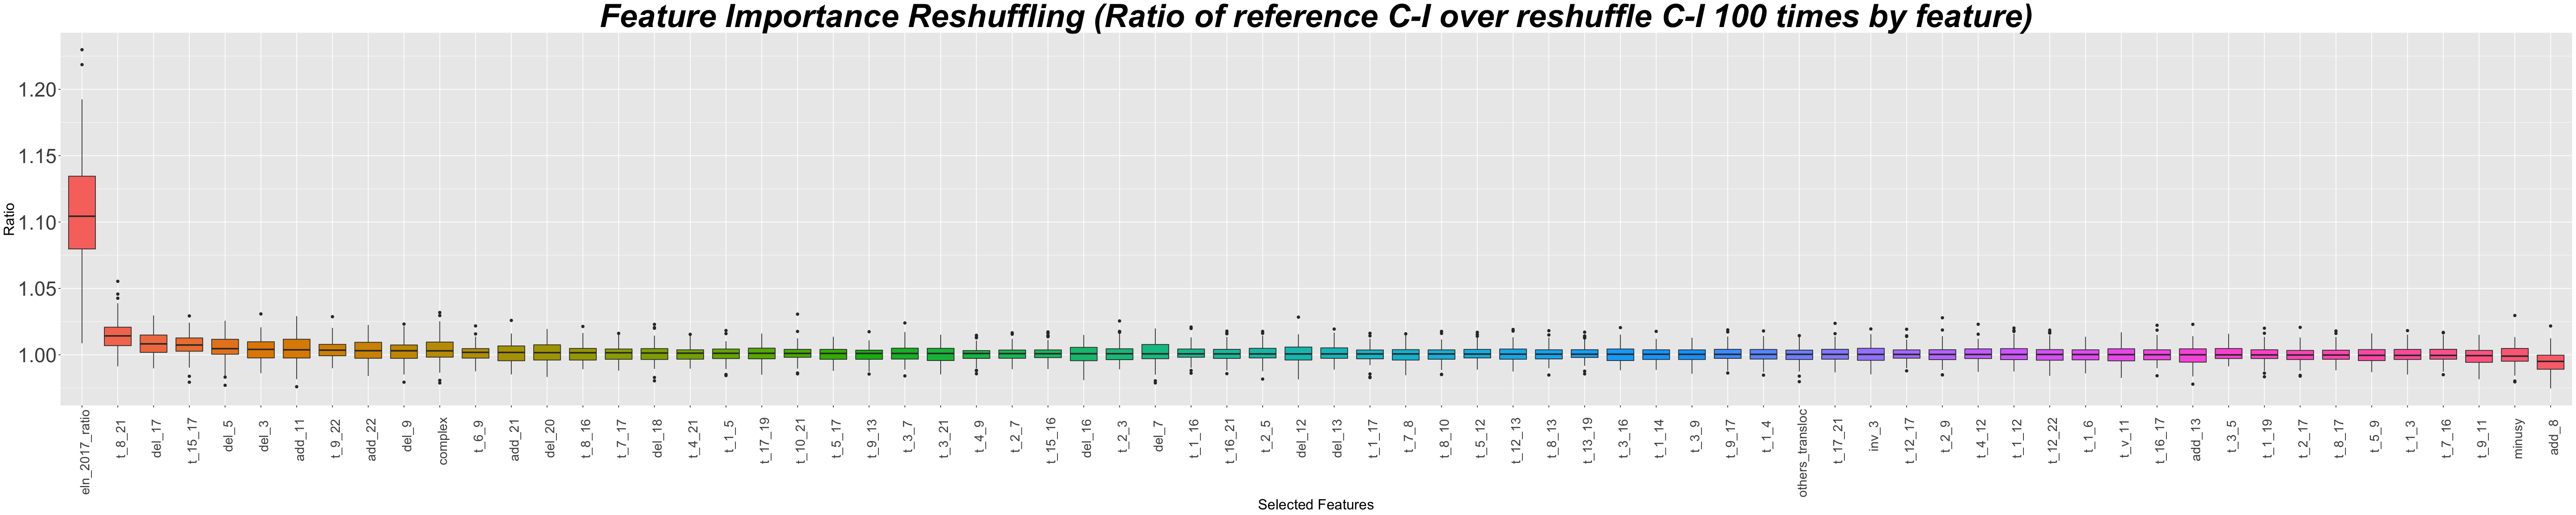

In [122]:
plotting(F,"eln_cyto")

## C) Components and Cytogenetic

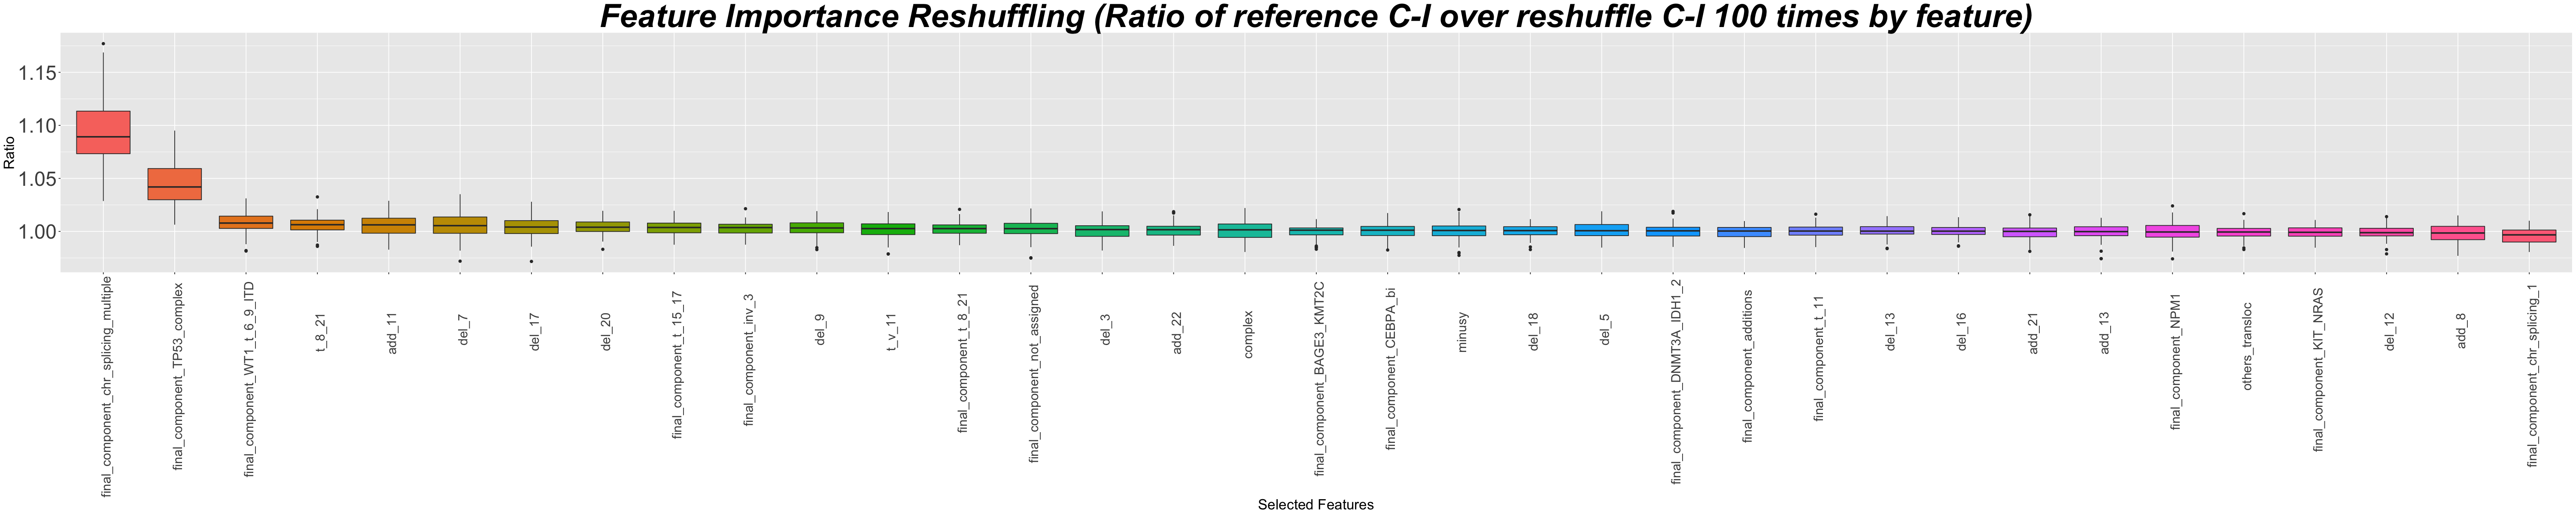

In [138]:
plotting(F,"comp_cyto")

# IV) ELN ,Genetic and Cytogenetic

## A) ELN Stratified

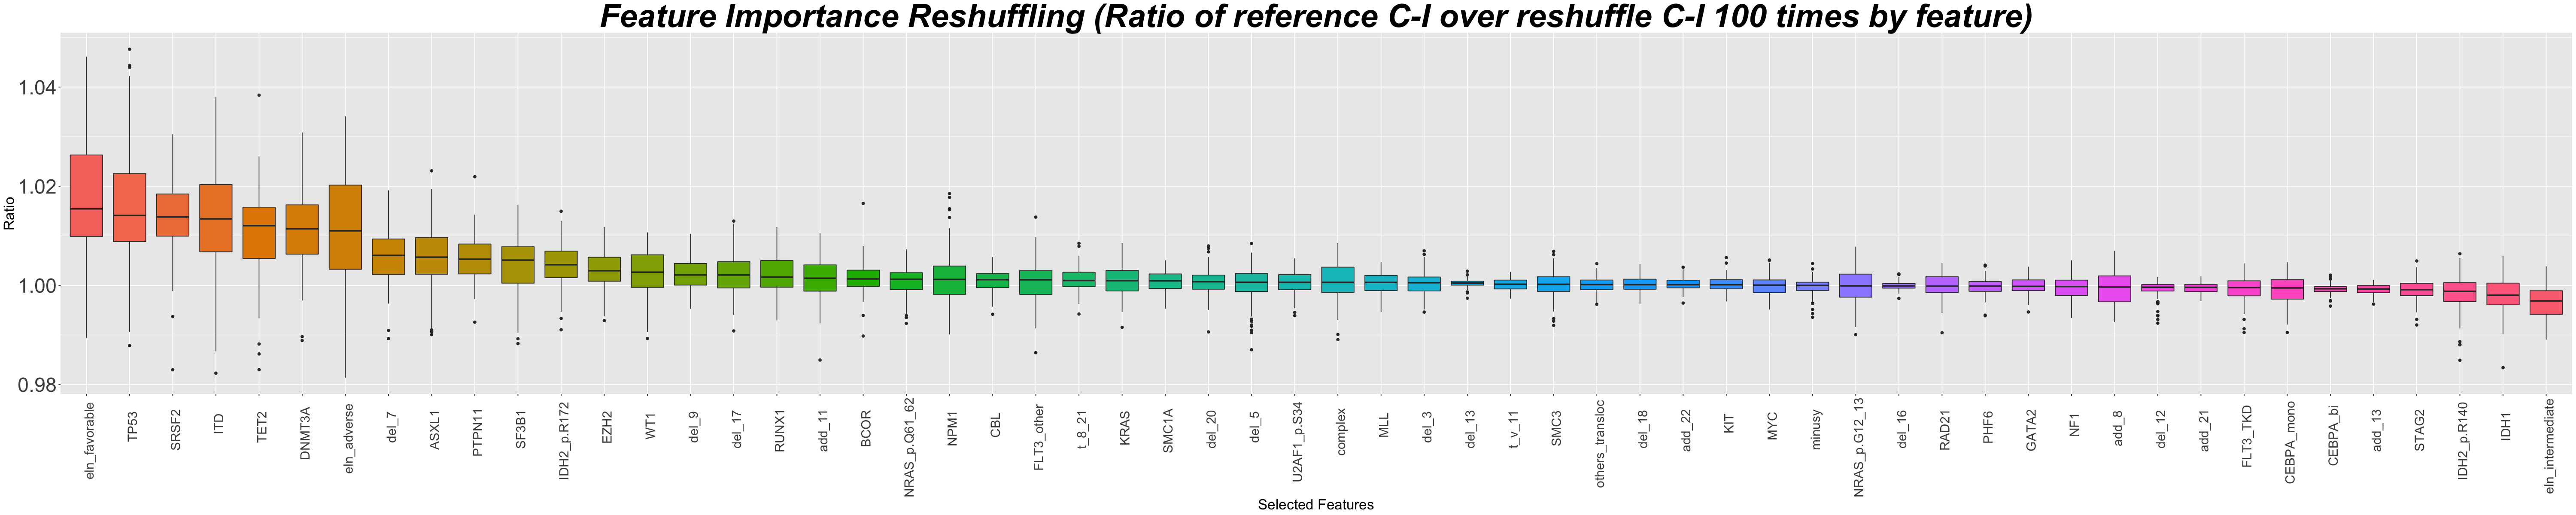

In [134]:
plotting(name="eln_gen_cyto")

## B) ELN Not Stratified

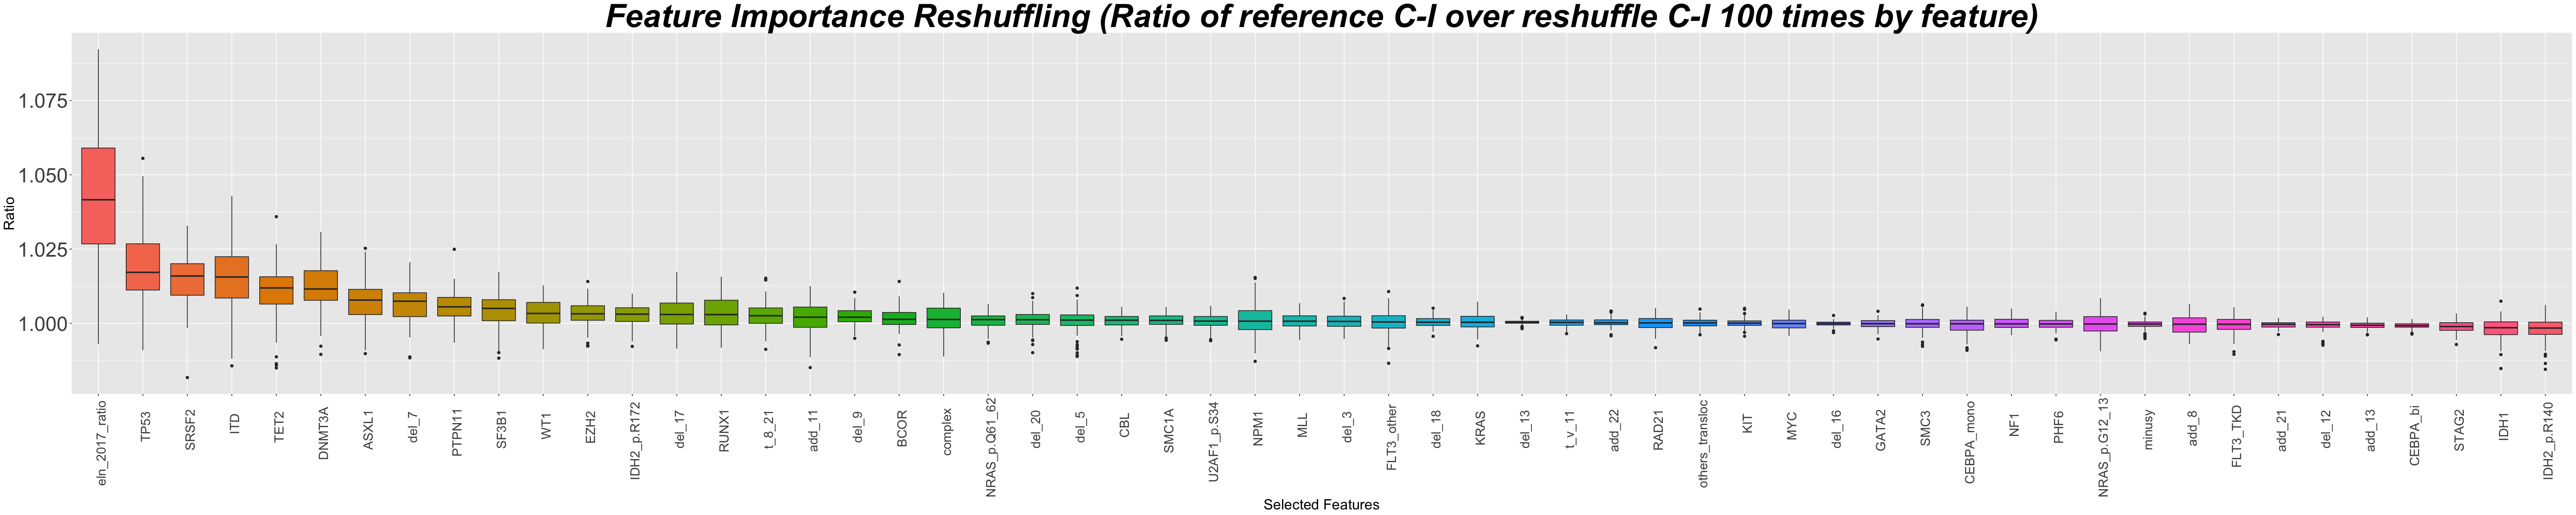

In [135]:
plotting(F,"eln_gen_cyto")

## C) Components , Genetic and Cytogenetic

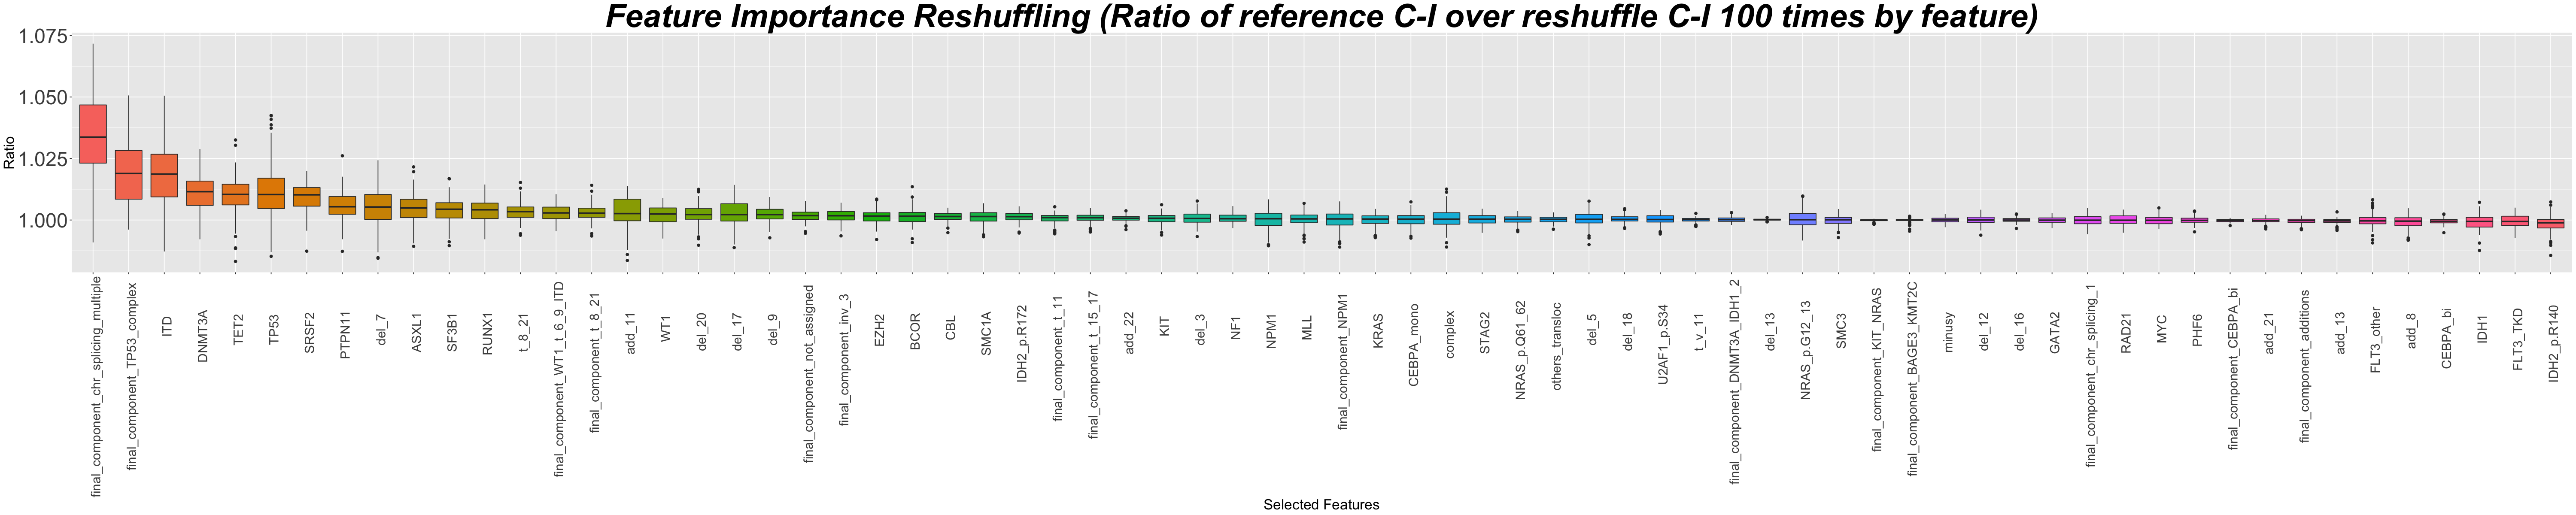

In [139]:
plotting(F,"comp_gen_cyto")

# V) ELN , Components , Genetic and Cytogenetic

## A) ELN Stratified

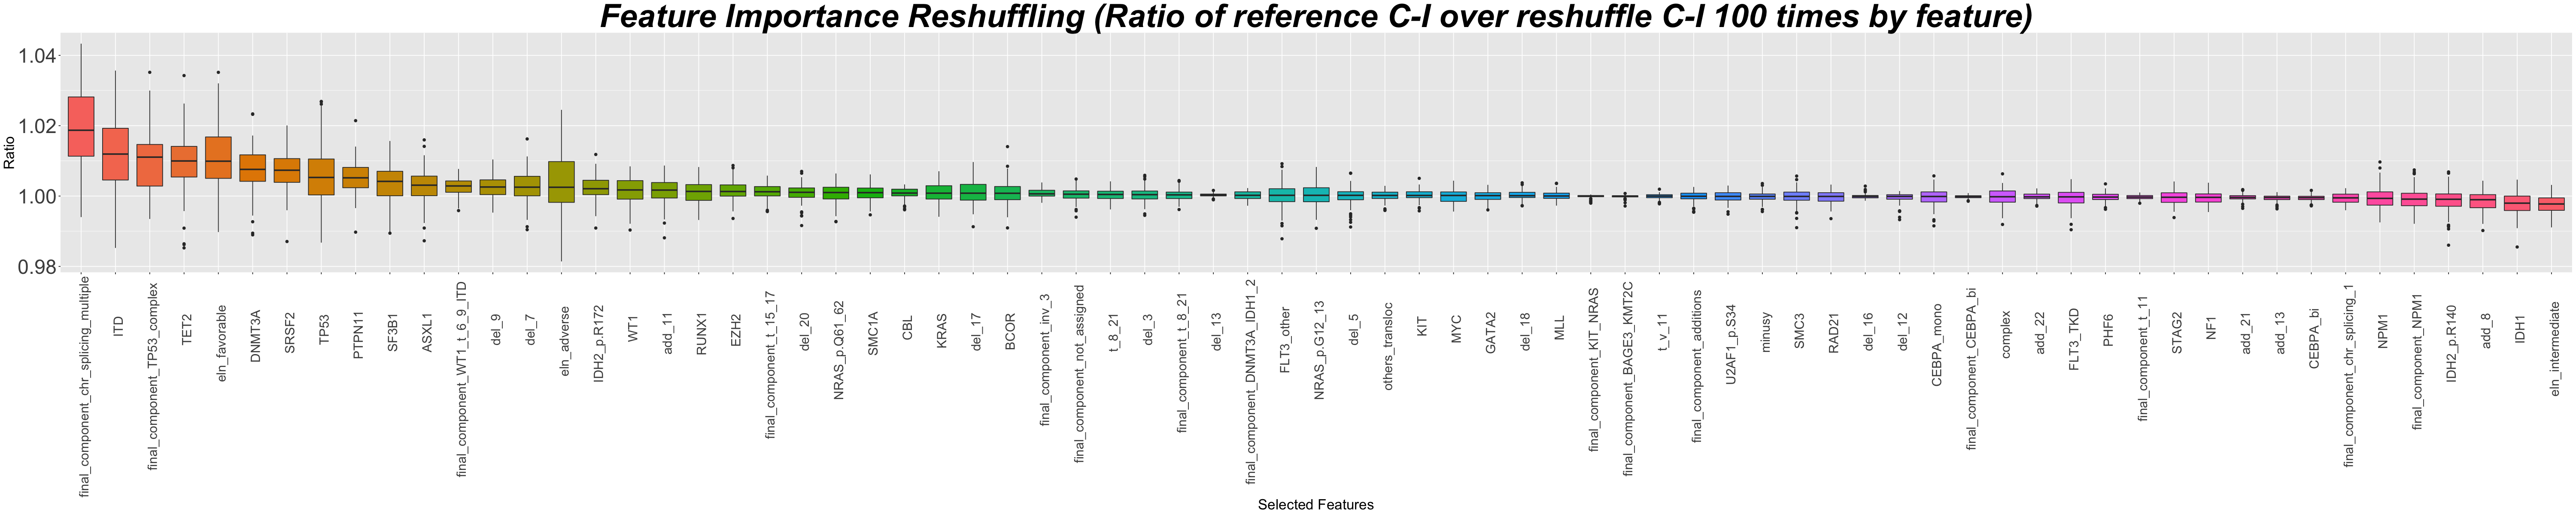

In [140]:
plotting(T,"eln_comp_gen_cyto")

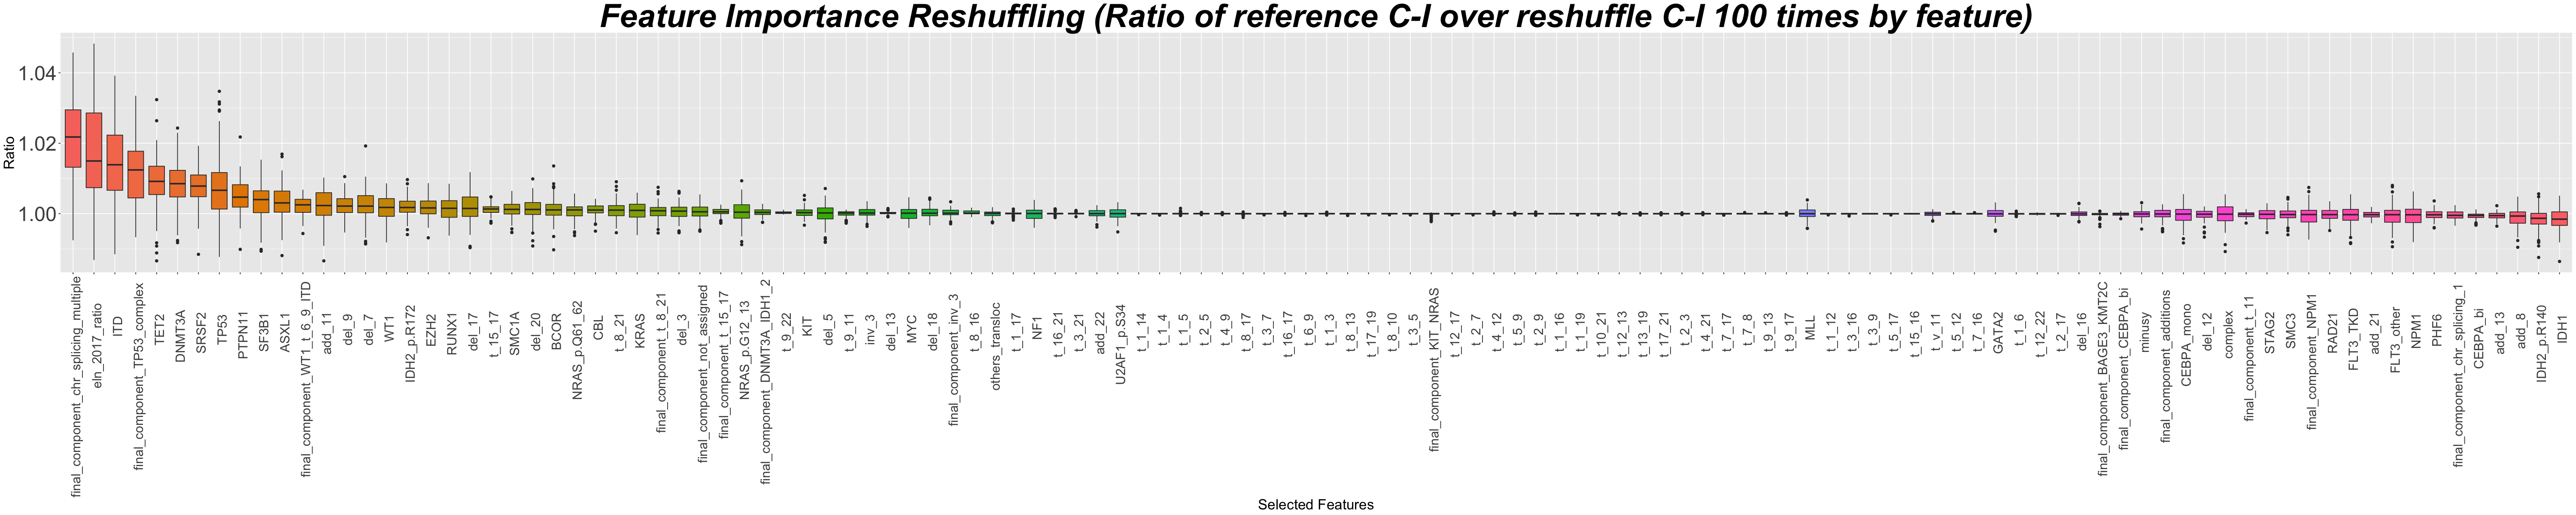

In [148]:
plotting(F,"eln_comp_gen_cyto")

In [153]:
unique(read.table("../Reshuffling/cyto_reshuffle_importance.tsv")$feature)

[1] add_8           add_11          add_13          add_21         
 [5] add_22          del_20          del_3           del_5          
 [9] del_7           del_9           del_12          del_13         
[13] del_16          del_17          del_18          minusy         
[17] t_v_11          t_10_21         t_12_13         t_12_17        
[21] t_12_22         t_13_19         t_15_16         t_15_17        
[25] t_16_17         t_16_21         t_17_19         t_17_21        
[29] t_1_12          t_1_14          t_1_16          t_1_17         
[33] t_1_19          t_1_3           t_1_4           t_1_5          
[37] t_1_6           t_2_17          t_2_3           t_2_5          
[41] t_2_7           t_2_9           t_3_16          t_3_21         
[45] t_3_5           t_3_7           t_3_9           t_4_12         
[49] t_4_21          t_4_9           t_5_12          t_5_17         
[53] t_5_9           t_6_9           t_7_16          t_7_17         
[57] t_7_8           t_8_10          t_8_13          t_8_16         
[61] t_8_17          t_8_21          t_9_11          t_9_13         
[65] t_9_17          t_9_22          others_transloc complex        
[69] inv_3          
69 Levels: add_11 add_13 add_21 add_22 add_8 complex del_12 del_13 ... t_v_11

In [151]:
df_final <- read.table("../data_frame_final_prognosis.tsv")
##---------------------------------------------------------------------------------MODELS TO TRY


eln <- c(1)
comp <- c(164:178)
age <- c(163)
all_gen <- c(2:85)
vect <- apply(X=df_final[,all_gen],2,FUN=function(x) 100*length(which(x==1))/dim(df_final)[1])
gen <- match(names(vect[vect>=2]),names(df_final))
all_cyto <- c(86:154)
vect <- apply(X=df_final[,all_cyto],2,FUN=function(x) 100*length(which(x==1))/dim(df_final)[1])
cyto <- match(names(vect[vect>=2]),names(df_final))

In [152]:
colnames(df_final[,c(eln,comp,gen,cyto)])

[1] "eln_2017_ratio"                       
 [2] "final_component_additions"            
 [3] "final_component_BAGE3_KMT2C"          
 [4] "final_component_CEBPA_bi"             
 [5] "final_component_chr_splicing_1"       
 [6] "final_component_chr_splicing_multiple"
 [7] "final_component_DNMT3A_IDH1_2"        
 [8] "final_component_inv_3"                
 [9] "final_component_KIT_NRAS"             
[10] "final_component_not_assigned"         
[11] "final_component_NPM1"                 
[12] "final_component_t_11"                 
[13] "final_component_t_15_17"              
[14] "final_component_t_8_21"               
[15] "final_component_TP53_complex"         
[16] "final_component_WT1_t_6_9_ITD"        
[17] "ASXL1"                                
[18] "BCOR"                                 
[19] "CBL"                                  
[20] "CEBPA_bi"                             
[21] "CEBPA_mono"                           
[22] "DNMT3A"                               
[23] "EZH2"                                 
[24] "ITD"                                  
[25] "FLT3_TKD"                             
[26] "FLT3_other"                           
[27] "GATA2"                                
[28] "IDH1"                                 
[29] "IDH2_p.R140"                          
[30] "IDH2_p.R172"                          
[31] "KIT"                                  
[32] "KRAS"                                 
[33] "MLL"                                  
[34] "MYC"                                  
[35] "NF1"                                  
[36] "NPM1"                                 
[37] "NRAS_p.G12_13"                        
[38] "NRAS_p.Q61_62"                        
[39] "PHF6"                                 
[40] "PTPN11"                               
[41] "RAD21"                                
[42] "RUNX1"                                
[43] "SF3B1"                                
[44] "SMC1A"                                
[45] "SMC3"                                 
[46] "SRSF2"                                
[47] "STAG2"                                
[48] "TET2"                                 
[49] "TP53"                                 
[50] "U2AF1_p.S34"                          
[51] "WT1"                                  
[52] "add_8"                                
[53] "add_11"                               
[54] "add_13"                               
[55] "add_21"                               
[56] "add_22"                               
[57] "del_20"                               
[58] "del_3"                                
[59] "del_5"                                
[60] "del_7"                                
[61] "del_9"                                
[62] "del_12"                               
[63] "del_13"                               
[64] "del_16"                               
[65] "del_17"                               
[66] "del_18"                               
[67] "minusy"                               
[68] "t_v_11"                               
[69] "t_8_21"                               
[70] "others_transloc"                      
[71] "complex"